<a href="https://colab.research.google.com/github/trivedisunita/MLLearning/blob/main/Fake_and_Real_news_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part-1
Importing Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [2]:
data_fake = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/dataset/Fake.csv')

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Add One more column to Dataset

In [4]:
data_fake['label'] = 0

In [5]:
data_fake.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

Load True_csv Dataset

In [6]:
data_true = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/dataset/True.csv')

Add the same column label to data set and assign value 1

In [7]:
data_true['label'] = 1

In [8]:
data_true.head()
  


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


concat both the dataset

In [9]:
data = pd.concat([data_fake,data_true],ignore_index=True)

In [11]:
#data.head()
data.tail()

,title,text,subject,date,label
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


#Part-2
Data Preprocessing

    Data explore


In [17]:
data.shape

(44898, 5)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [14]:
data.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

#Check for missing value

In [15]:
data.isnull().values.any()

False

In [16]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

#Data Cleaning

We should drop date and title column from the dataset as they are not in useful for prediction.
before procedding we should make a copy of dataset for not to affect original dataset.


In [19]:
df1 = data.copy()
df1.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Drop the not useful column

In [20]:
df1.drop(['title','date'],axis=1,inplace=True)


In [21]:
df1.head()

,text,subject,label
0,Donald Trump just couldn t wish all Americans ...,News,0
1,House Intelligence Committee Chairman Devin Nu...,News,0
2,"On Friday, it was revealed that former Milwauk...",News,0
3,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis used his annual Christmas Day mes...,News,0


#Data Visualization

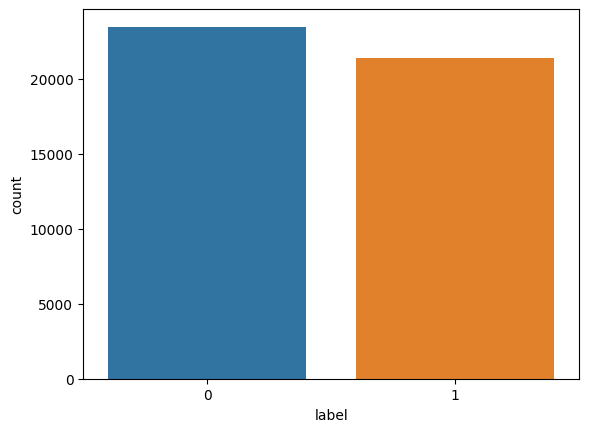

In [25]:
sns.countplot(data=df1, x= 'label')
plt.show()

Data distribution per categpry

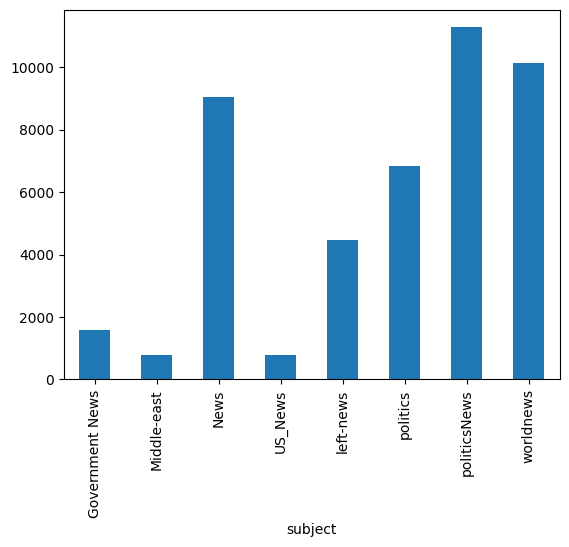

In [26]:
df1.groupby(['subject'])['text'].count().plot(kind='bar')
plt.show()

Clean the punctuation marks from the text column string

In [22]:
df1['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [27]:
import re
import string



In [71]:
def filter(df1):
  text = df1.lower()
  text = re.sub('\[.*?\]','',text)
  text= re.sub("\\W"," ",text)
  text = re.sub('https?://\s+|www\.S+','',text)
  text= re.sub('<.*?>+','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text =  re.sub('\w*\d\w*','',text)
  return text

Apply this filter function to dataframe

In [29]:
df1['text'] = df1['text'].apply(filter)

In [30]:
df1.head()

,text,subject,label
0,donald trump just couldn t wish all americans ...,News,0
1,house intelligence committee chairman devin nu...,News,0
2,on friday it was revealed that former milwauk...,News,0
3,on christmas day donald trump announced that ...,News,0
4,pope francis used his annual christmas day mes...,News,0


#Dependant and independant variable

In [31]:
x = df1['text']
y = df1['label']

#Spliting dataset for training and test purpose

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=40)

#Vecorizing text from dataset 
This convert data(image and tex) into format supported by ML 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vector = TfidfVectorizer()
xv_train = tf_vector.fit_transform(x_train)
xv_test = tf_vector.transform(x_test)

In [35]:
xv_train

<35918x97238 sparse matrix of type '<class 'numpy.float64'>'
	with 7370762 stored elements in Compressed Sparse Row format>

#Building model using Logistic Regression

#Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [38]:
y_pred = lr.predict(xv_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [40]:
acc = accuracy_score(y_test, y_pred)
acc

0.9863028953229399

In [42]:
precision = precision_score(y_test, y_pred)
precision

0.9851439182915506

In [43]:
recl_score = recall_score(y_test, y_pred)
recl_score

0.9862886358354637

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4613,   64],
       [  59, 4244]])

#Predict single obsevation

In [57]:
df1.head()

,text,subject,label
0,donald trump just couldn t wish all americans ...,News,0
1,house intelligence committee chairman devin nu...,News,0
2,on friday it was revealed that former milwauk...,News,0
3,on christmas day donald trump announced that ...,News,0
4,pope francis used his annual christmas day mes...,News,0


In [63]:
df1['text'][0]

'donald trump just couldn t wish all americans a happy new year and leave it at that  instead  he had to give a shout out to his enemies  haters and  the very dishonest fake news media   the former reality show star had just one job to do and he couldn t do it  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   president angry pants tweeted    will be a great year for america  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   will be a great year for america   donald j  trump   realdonaldtrump  december    s tweet went down about as welll as you d expect what kind of president sends a new year s greeting like this despicable  petty  infantile gibberish  only trump  his lack of decency won t even allow him to ris

In [66]:
single_obs = [['donald trump just couldn t wish all americans a happy new year and leave it at that  instead  he had to give a shout out to his enemies  haters and  the very dishonest fake news media   the former reality show star had just one job to do and he couldn t do it  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   president angry pants tweeted    will be a great year for america  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   will be a great year for america   donald j  trump   realdonaldtrump  december    s tweet went down about as welll as you d expect what kind of president sends a new year s greeting like this despicable  petty  infantile gibberish  only trump  his lack of decency won t even allow him to rise above the gutter long enough to wish the american citizens a happy new year   bishop talbert swan   talbertswan  december    one likes you  calvin   calvinstowell  december    impeachment would make  a great year for america  but i ll also accept regaining control of congress   miranda yaver   mirandayaver  december    you hear yourself talk  when you have to include that many people that hate you you have to wonder  why do the they all hate me   alan sandoval     december    uses the word haters in a new years wish    marlene     december    can t just say happy new year   koren pollitt   korencarpenter  december    s trump s new year s eve tweet from  happy new year to all  including to my many enemies and those who have fought me and lost so badly they just don t know what to do  love   donald j  trump   realdonaldtrump  december    is nothing new for trump  he s been doing this for years trump has directed messages to his  enemies  and  haters  for new year s  easter  thanksgiving  and the anniversary of    pic twitter com   daniel dale     december    s holiday tweets are clearly not presidential how long did he work at hallmark before becoming president   steven goodine   sgoodine  december    s always been like this       the only difference is that in the last few years  his filter has been breaking down   roy schulze   thbthttt  december     apart from a teenager uses the term haters   wendy   wendywhistles  december    s a fucking  year old  who knows     december     to all the people who voted for this a hole thinking he would change once he got into power  you were wrong   year old men don t change and now he s a year older photo by andrew burton getty images ','news']]
single_obs

[['donald trump just couldn t wish all americans a happy new year and leave it at that  instead  he had to give a shout out to his enemies  haters and  the very dishonest fake news media   the former reality show star had just one job to do and he couldn t do it  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   president angry pants tweeted    will be a great year for america  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   will be a great year for america   donald j  trump   realdonaldtrump  december    s tweet went down about as welll as you d expect what kind of president sends a new year s greeting like this despicable  petty  infantile gibberish  only trump  his lack of decency won t even allow him to r

In [84]:
def output(news):
  if news==0:
    return 'Fake news'
  if news ==1:
    return 'True news'  

def test(news):
  test_news = {'text': [news]}
  new_df_test = pd.DataFrame(test_news)
  new_df_test['text'] = new_df_test['text'].apply(filter)
  new_x_test = new_df_test['text']
  new_xv_test = tf_vector.transform(new_x_test)
  y_pred = lr.predict(new_xv_test)
  
  return y_pred



In [85]:
news = str('donald trump just couldn t wish all americans a happy new year and leave it at that  instead  he had to give a shout out to his enemies  haters and  the very dishonest fake news media   the former reality show star had just one job to do and he couldn t do it  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   president angry pants tweeted    will be a great year for america  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   will be a great year for america   donald j  trump   realdonaldtrump  december    s tweet went down about as welll as you d expect what kind of president sends a new year s greeting like this despicable  petty  infantile gibberish  only trump  his lack of decency won t even allow him to rise above the gutter long enough to wish the american citizens a happy new year   bishop talbert swan   talbertswan  december    one likes you  calvin   calvinstowell  december    impeachment would make  a great year for america  but i ll also accept regaining control of congress   miranda yaver   mirandayaver  december    you hear yourself talk  when you have to include that many people that hate you you have to wonder  why do the they all hate me   alan sandoval     december    uses the word haters in a new years wish    marlene     december    can t just say happy new year   koren pollitt   korencarpenter  december    s trump s new year s eve tweet from  happy new year to all  including to my many enemies and those who have fought me and lost so badly they just don t know what to do  love   donald j  trump   realdonaldtrump  december    is nothing new for trump  he s been doing this for years trump has directed messages to his  enemies  and  haters  for new year s  easter  thanksgiving  and the anniversary of    pic twitter com   daniel dale     december    s holiday tweets are clearly not presidential how long did he work at hallmark before becoming president   steven goodine   sgoodine  december    s always been like this       the only difference is that in the last few years  his filter has been breaking down   roy schulze   thbthttt  december     apart from a teenager uses the term haters   wendy   wendywhistles  december    s a fucking  year old  who knows     december     to all the people who voted for this a hole thinking he would change once he got into power  you were wrong   year old men don t change and now he s a year older photo by andrew burton getty images')

In [86]:
test(news)

array([0])